Task 02: Credit Risk Prediction.

Objective:
Predict wheather a loan applicant is likely to default on a loan.

Dataset:
Laon Prediction Dataset(avaiable on Kaggle).
About Dataset:
1. Borrower’s Demographics:
age (int64) – Borrower's age (in years).
gender (category) – Borrower's gender (Male/Female).
marital_status (category) – Marital status (Single, Married, Divorced).
education_level (category) – Education level (High School, Bachelor, Master, PhD).
2. Financial Information:
annual_income (float64) – Borrower's yearly income.
monthly_income (float64) – Borrower's monthly income.
employment_status (category) – Current employment type (Employed, Self-Employed, Unemployed).
debt_to_income_ratio (float64) – Ratio of borrower’s debt to their income. Lower = better.
credit_score (int64) – Credit bureau score (e.g., FICO). Higher = less risky.
3. Loan Information:
loan_amount (float64) – Amount of loan taken.
loan_purpose (category) – Loan purpose (Car, Education, Home, Medical, etc.).
interest_rate (float64) – Loan par annual interest rate (%).
loan_term (int64) – Loan repayment duration (months, e.g., 36 or 60).
installment (float64) – Monthly installment .
grade_subgrade (category) – Risk category assigned to loan (A1, B2, etc.).
4. Borrower’s Credit History:
num_of_open_accounts (int64) – Total active credit accounts.
total_credit_limit (float64) – Borrower's total available credit limit.
current_balance (float64) – Borrower's outstanding balance (loan + credit card).
delinquency_history (int64) – Count of late payments in borrower’s history.
public_records (int64) – Negative public records (e.g., bankruptcies, legal actions).
num_of_delinquencies (int64) – Total delinquencies (missed payments).
5. Target Variable:
loan_paid_back (int64) – Target variable:
1 → Borrower paid loan in full.
0 → Borrower defaulted (did not repay fully).

Loading the Dataset.

In [1]:
import pandas as pd

In [2]:
Dataset = pd.read_csv("loan_dataset_20000.csv")

Data Exploration.

In [3]:
Dataset.head()

age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_accounts  \
0        36       581.88              B5                     7   
1        60       573.17              F1                     5   
2        60        76.32              B4                     2   
3        36       468.07              A5                     7   
4        60       395.50              D5                     1   

  total_credit_limit  current_balance  delinquency_history  public_records  \
0           40833.47         24302.07                    1               0   
1           27968.01         10803.01                    1               0   
2           15502.25          4505.44                    0               0   
3           18157.79          5525.63                    4               0   
4           17467.56          3593.91                    2               0   

   num_of_delinquencies  loan_paid_back  
0                     1               1  
1                     3               1  
2                     0               1  
3                     5               1  
4                     2               1  

[5 rows x 22 columns]

In [4]:
Dataset.tail()

age  gender marital_status education_level  annual_income  \
19995   39  Female        Married      Bachelor's       39640.08   
19996   66  Female        Married      Bachelor's       32062.90   
19997   65  Female         Single        Master's       18642.02   
19998   35    Male        Married        Master's       22181.39   
19999   36  Female        Married           Other       23737.70   

       monthly_income employment_status  debt_to_income_ratio  credit_score  \
19995         3303.34          Employed                 0.275           691   
19996         2671.91          Employed                 0.367           758   
19997         1553.50           Student                 0.106           751   
19998         1848.45           Retired                 0.275           646   
19999         1978.14          Employed                 0.228           630   

       loan_amount  ... loan_term  installment  grade_subgrade  \
19995     16322.23  ...        36       566.22              C5   
19996     16697.34  ...        36       553.71              B5   
19997     23924.78  ...        36       772.66              B4   
19998     16920.13  ...        36       595.36              D2   
19999     15769.75  ...        36       531.88              D2   

       num_of_open_accounts total_credit_limit  current_balance  \
19995                     2           23748.10          5801.45   
19996                     8           49929.65         40901.31   
19997                     3           13137.57          5075.67   
19998                     5           19580.82          3876.16   
19999                     8           43013.59         12753.03   

       delinquency_history  public_records  num_of_delinquencies  \
19995                    1               0                     4   
19996                    3               0                     3   
19997                    1               0                     2   
19998                    4               0                     5   
19999                    2               0                     2   

       loan_paid_back  
19995               0  
19996               1  
19997               1  
19998               1  
19999               0  

[5 rows x 22 columns]

In [5]:
Dataset.shape

(20000, 22)

In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   20000 non-null  int64  
 1   gender                20000 non-null  object 
 2   marital_status        20000 non-null  object 
 3   education_level       20000 non-null  object 
 4   annual_income         20000 non-null  float64
 5   monthly_income        20000 non-null  float64
 6   employment_status     20000 non-null  object 
 7   debt_to_income_ratio  20000 non-null  float64
 8   credit_score          20000 non-null  int64  
 9   loan_amount           20000 non-null  float64
 10  loan_purpose          20000 non-null  object 
 11  interest_rate         20000 non-null  float64
 12  loan_term             20000 non-null  int64  
 13  installment           20000 non-null  float64
 14  grade_subgrade        20000 non-null  object 
 15  num_of_open_account

In [7]:
Dataset.describe()

age  annual_income  monthly_income  debt_to_income_ratio  \
count  20000.000000   20000.000000    20000.000000          20000.000000   
mean      48.027000   43549.637765     3629.136466              0.177019   
std       15.829352   28668.579671     2389.048326              0.105059   
min       21.000000    6000.000000      500.000000              0.010000   
25%       35.000000   24260.752500     2021.730000              0.096000   
50%       48.000000   36585.260000     3048.770000              0.160000   
75%       62.000000   54677.917500     4556.495000              0.241000   
max       75.000000  400000.000000    33333.330000              0.667000   

       credit_score   loan_amount  interest_rate    loan_term   installment  \
count   20000.00000  20000.000000   20000.000000  20000.00000  20000.000000   
mean      679.25695  15129.300909      12.400627     43.22280    455.625794   
std        69.63858   8605.405513       2.442729     11.00838    274.622125   
min       373.00000    500.000000       3.140000     36.00000      9.430000   
25%       632.00000   8852.695000      10.740000     36.00000    253.910000   
50%       680.00000  14946.170000      12.400000     36.00000    435.595000   
75%       727.00000  20998.867500      14.002500     60.00000    633.595000   
max       850.00000  49039.690000      22.510000     60.00000   1685.400000   

       num_of_open_accounts  total_credit_limit  current_balance  \
count          20000.000000        20000.000000     20000.000000   
mean               5.011800        48649.824769     24333.394631   
std                2.244529        32423.378128     22313.845395   
min                0.000000         6157.800000       496.350000   
25%                3.000000        27180.492500      9592.572500   
50%                5.000000        40241.615000     18334.555000   
75%                6.000000        60361.257500     31743.327500   
max               15.000000       454394.190000    352177.900000   

       delinquency_history  public_records  num_of_delinquencies  \
count         20000.000000    20000.000000          20000.000000   
mean              1.990150        0.061800              2.489150   
std               1.474945        0.285105              1.631384   
min               0.000000        0.000000              0.000000   
25%               1.000000        0.000000              1.000000   
50%               2.000000        0.000000              2.000000   
75%               3.000000        0.000000              3.000000   
max              11.000000        2.000000             11.000000   

       loan_paid_back  
count    20000.000000  
mean         0.799900  
std          0.400085  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [8]:
Dataset.columns

Index(['age', 'gender', 'marital_status', 'education_level', 'annual_income',
       'monthly_income', 'employment_status', 'debt_to_income_ratio',
       'credit_score', 'loan_amount', 'loan_purpose', 'interest_rate',
       'loan_term', 'installment', 'grade_subgrade', 'num_of_open_accounts',
       'total_credit_limit', 'current_balance', 'delinquency_history',
       'public_records', 'num_of_delinquencies', 'loan_paid_back'],
      dtype='object')

In [9]:
Dataset.dtypes

age                       int64
gender                   object
marital_status           object
education_level          object
annual_income           float64
monthly_income          float64
employment_status        object
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
loan_purpose             object
interest_rate           float64
loan_term                 int64
installment             float64
grade_subgrade           object
num_of_open_accounts      int64
total_credit_limit      float64
current_balance         float64
delinquency_history       int64
public_records            int64
num_of_delinquencies      int64
loan_paid_back            int64
dtype: object

Visualize key feactures such as laon amount, education and income.

In [10]:
import matplotlib as pyplot
from matplotlib import pyplot as plt

import seaborn as sns

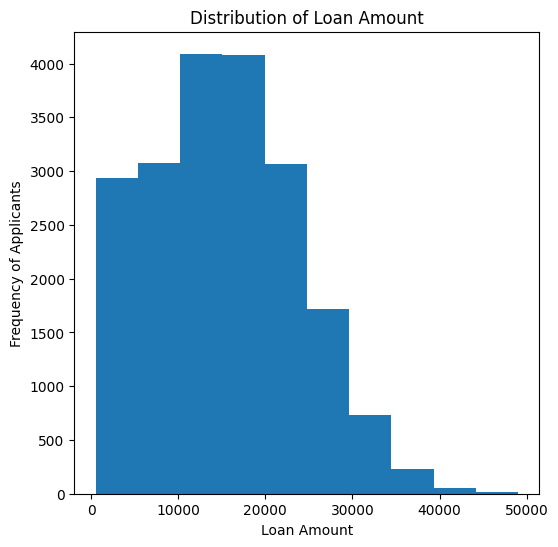

In [11]:
plt.figure(figsize=(6,6))

plt.hist(Dataset["loan_amount"])

plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency of Applicants")

plt.show()

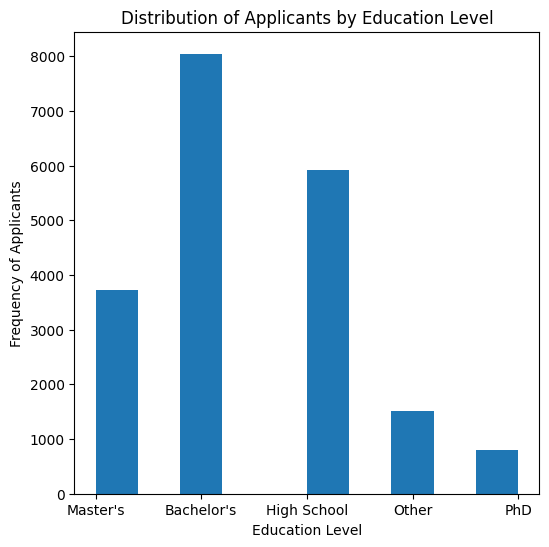

In [12]:
plt.figure(figsize=(6,6))

plt.hist(Dataset["education_level"])

plt.title("Distribution of Applicants by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Frequency of Applicants")

plt.show()

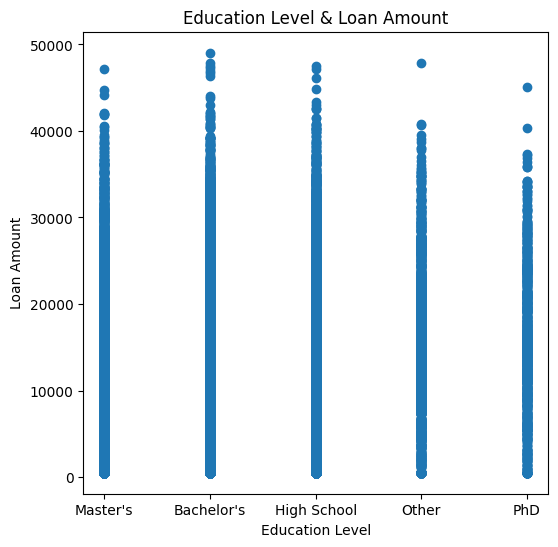

In [13]:
plt.figure(figsize=(6,6))

plt.scatter(Dataset["education_level"], Dataset["loan_amount"])

plt.title("Education Level & Loan Amount")
plt.xlabel("Education Level")
plt.ylabel("Loan Amount")

plt.show()

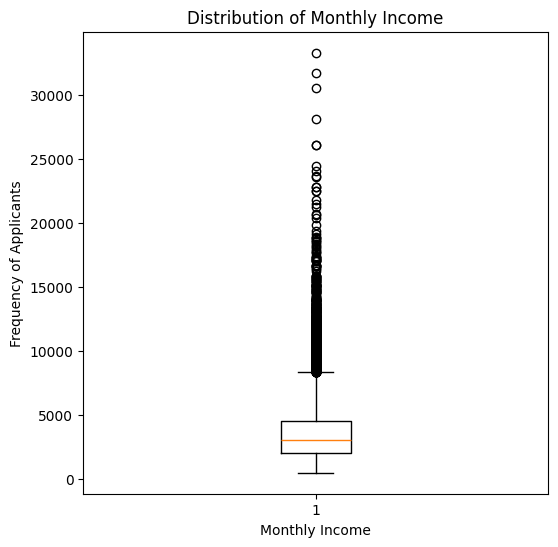

In [14]:
plt.figure(figsize=(6,6))

plt.boxplot(Dataset["monthly_income"])

plt.title("Distribution of Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Frequency of Applicants")

plt.show()

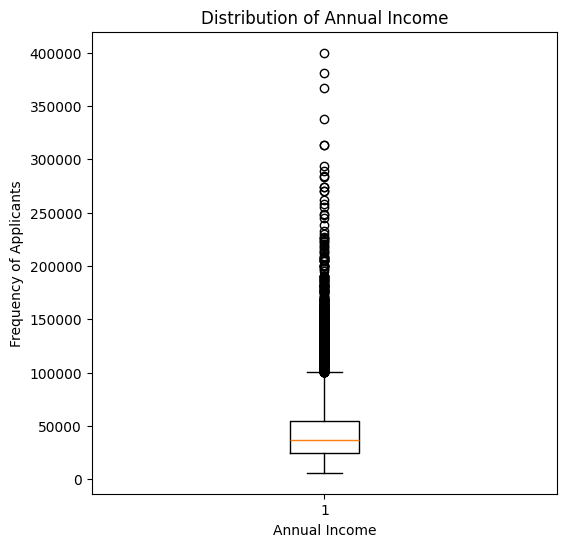

In [15]:
plt.figure(figsize=(6,6))

plt.boxplot(Dataset["annual_income"])

plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency of Applicants")

plt.show()

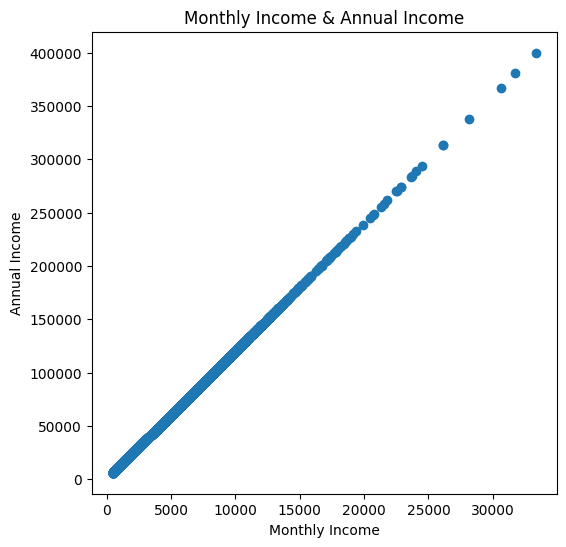

In [16]:
plt.figure(figsize=(6,6))

plt.scatter(Dataset["monthly_income"], Dataset["annual_income"])

plt.title("Monthly Income & Annual Income")
plt.xlabel("Monthly Income")
plt.ylabel("Annual Income")

plt.show()

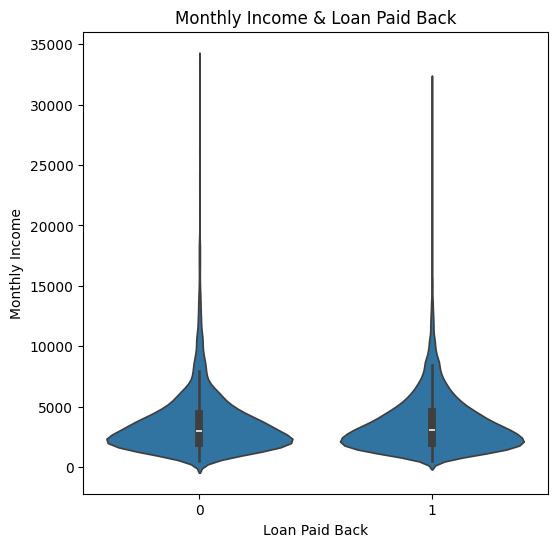

In [17]:
plt.figure(figsize=(6,6))

sns.violinplot(x="loan_paid_back", y="monthly_income", data=Dataset)

plt.title("Monthly Income & Loan Paid Back")
plt.xlabel("Loan Paid Back")
plt.ylabel("Monthly Income")

plt.show()

<Figure size 500x3000 with 0 Axes>

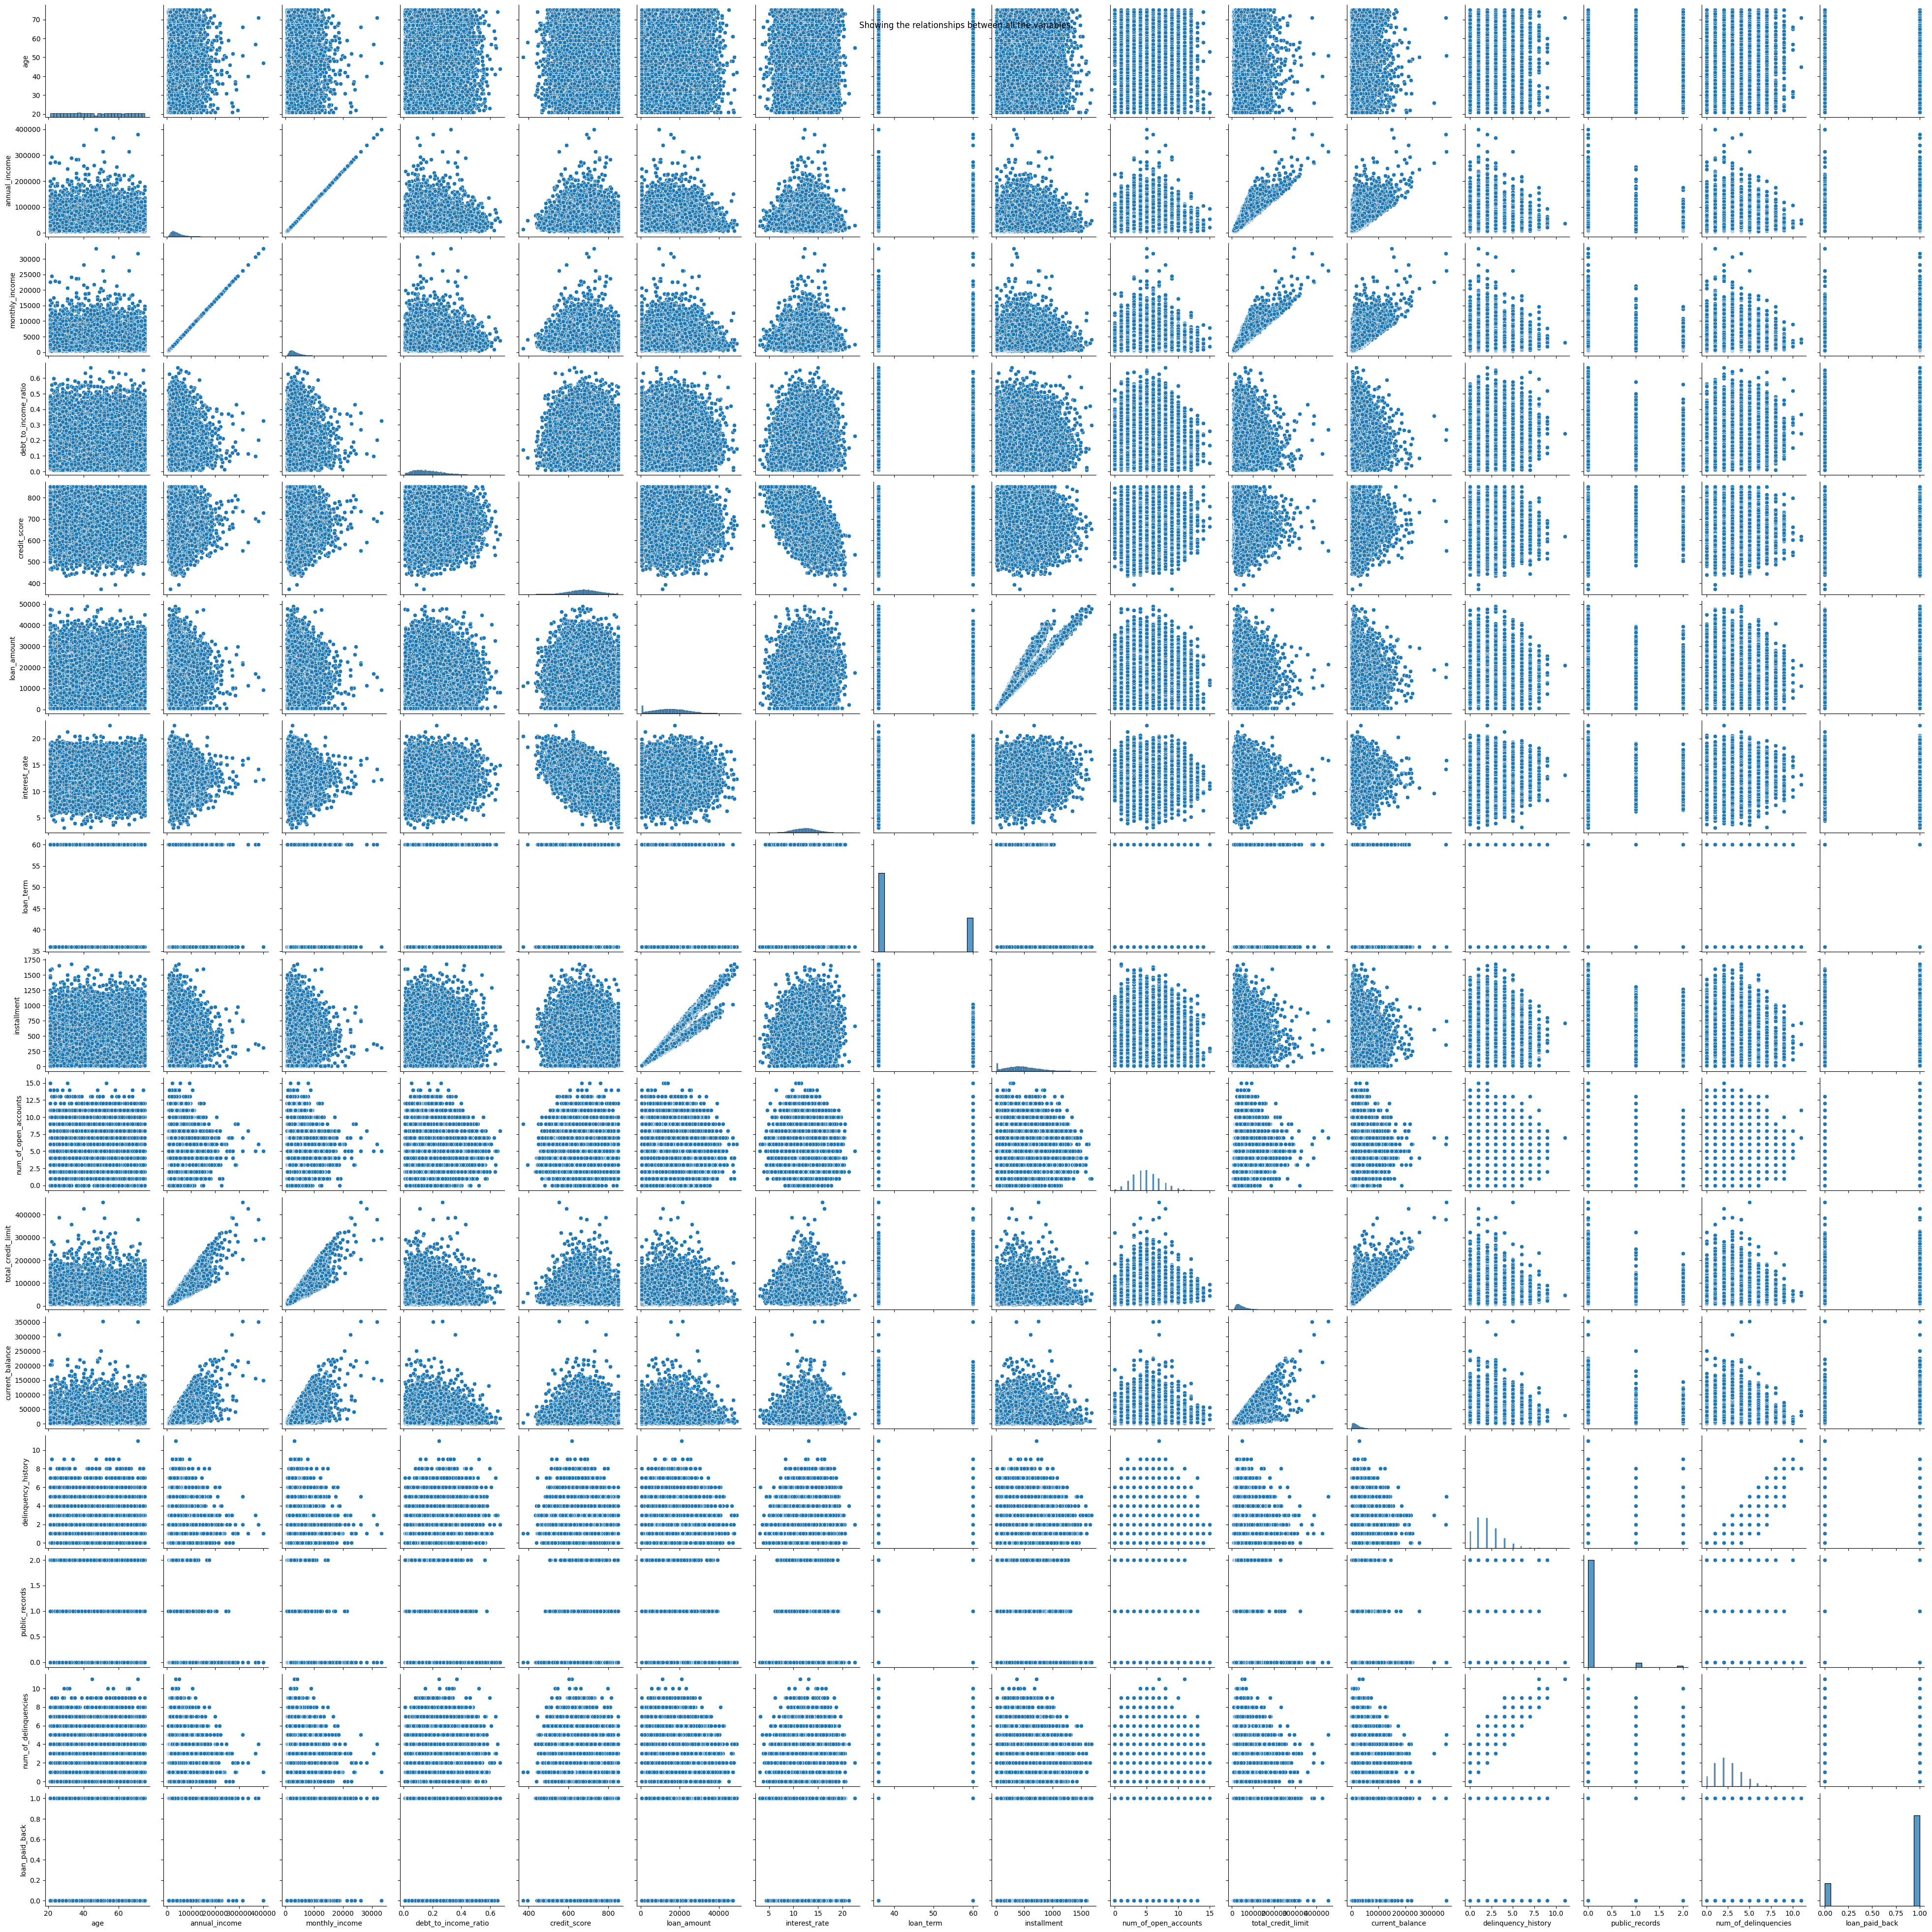

In [18]:
plt.figure(figsize=(5,30))

sns.pairplot(Dataset)

plt.suptitle("Showing the relationships between all the variables.")

plt.show()

Instructions:
Handle missing values appropriately.

In [19]:
# Import Libraries.

import pandas as pd
import numpy as np

import matplotlib as pyplot
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Check missing values per column.

print(Dataset.isnull().sum())

# This output means:
# No NaN values.
# No empty cells.
# No imputation required.
# Dataset is already clean for missing data.

age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64


In [21]:
# Dataset have no missing values.If Dataset have missing values then we use use the following method.

# Decide strategy:
# Numerical: Fill with median.
# Categorical: Fill with most frequent.

numerical_columns = Dataset.select_dtypes(include=["int64","float64"]).columns
categorical_columns = Dataset.select_dtypes(include=["object"]).columns

numerical_imputer = SimpleImputer(strategy="median")
categorical_imputer = SimpleImputer(strategy="most_frequent")

Dataset[numerical_columns] = numerical_imputer.fit_transform(Dataset[numerical_columns])
Dataset[categorical_columns] = categorical_imputer.fit_transform(Dataset[categorical_columns])

In [22]:
print(Dataset.isnull().sum().sum())

0


Train a Clasification Model like Logistic Regression and Decision Tree.

Logistic Model 01.

In [23]:
x = Dataset.drop("loan_paid_back", axis=1)
y = Dataset["loan_paid_back"]

In [24]:
x = pd.get_dummies(x, drop_first=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)

Training Data: (16000, 64)
Testing Data: (4000, 64)


In [27]:
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(x_train, y_train)

y_predict_logistic = logistic_model.predict(x_test)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTree Model.

In [28]:
decisionTree_model = DecisionTreeClassifier(random_state=42)

decisionTree_model.fit(x_train, y_train)

y_predict_decisionTree = decisionTree_model.predict(x_test)

Evaluate the model using accuracy and a confusion matrix.

In [29]:
print("Logistic Regression Accuracy: \n",
      accuracy_score(y_test, y_predict_logistic))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_logistic))

Logistic Regression Accuracy: 
 0.7955
Confusion Matrix: 
 [[   0  818]
 [   0 3182]]


In [30]:
cm = confusion_matrix(y_test, y_predict_logistic)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})

print(metrics_table)

      Metric      Value
0         TP  3182.0000
1         TN     0.0000
2         FP   818.0000
3         FN     0.0000
4   Accuracy     0.7955
5  Precision     0.7955
6     Recall     1.0000


In [31]:
print("Decision Tree Accuracy: \n",
      accuracy_score(y_test, y_predict_decisionTree))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_decisionTree))

Decision Tree Accuracy: 
 0.8275
Confusion Matrix: 
 [[ 491  327]
 [ 363 2819]]


In [32]:
cm = confusion_matrix(y_test, y_predict_decisionTree)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})
print(metrics_table)

      Metric        Value
0         TP  2819.000000
1         TN   491.000000
2         FP   327.000000
3         FN   363.000000
4   Accuracy     0.827500
5  Precision     0.896058
6     Recall     0.885921


Skills:
Data cleaning and handling missing values.
Exploratory Data Analysis (EDA).
Binary classification using machine learning.
Model evaluation using confusion and accuracy.

Task completed.
Best wishes.
Zaigham Abbas.